Graduate Supplement

Task a

In [29]:
import numpy as np

reduced_h = 1     # in atomic units
m = 1             # in atomic units
L = 1.0           # in atomic units a0 (Bohr radius)

grid_points = np.linspace(-L/2, L/2, 2000)


In [30]:
print(len(grid_points))
print(grid_points[-2]-grid_points[-1])

2000
-0.0005002501250626068


In [31]:
def construct_laplacian(size, delta_x):
    identity_I = np.identity(size)
    off_diagonal_values = np.ones(size - 1)
    off_diagonal_I = np.diag(off_diagonal_values, k=-1) + np.diag(off_diagonal_values, k=1)

    laplacian = 1/(delta_x**2)*(-2*identity_I + off_diagonal_I)

    return laplacian

In [32]:
size = len(grid_points)
delta_x = grid_points[1] - grid_points[0]

laplacian_matrix = construct_laplacian(size, delta_x)

H_matrix = -(reduced_h**2)/(2*m)*laplacian_matrix

eigenvalues, eigenvectors = np.linalg.eig(H_matrix)

print(f"The first 7 eigenvalues are: {sorted(eigenvalues)[:7]}")




The first 7 eigenvalues are: [4.92494144656586, 19.69975364761087, 44.324400181164194, 78.798820354103, 123.12292918660194, 177.29661742108036, 241.31975152510321]


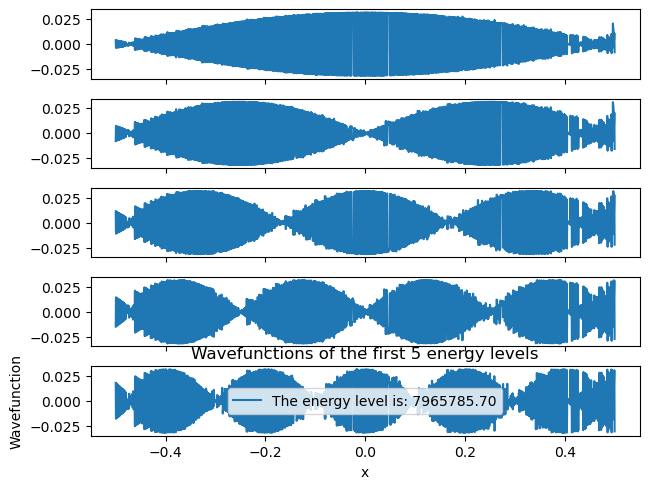

In [36]:
import matplotlib.pyplot as plt

x = grid_points
y1 = eigenvectors[0]
y2 = eigenvectors[1]
y3 = eigenvectors[2]
y4 = eigenvectors[3]
y5 = eigenvectors[4]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, sharey=True)

ax1.plot(x, y1, label=f"The energy level is: {eigenvalues[0]:.2f}")
ax2.plot(x, y2, label=f"The energy level is: {eigenvalues[1]:.2f}")
ax3.plot(x, y3, label=f"The energy level is: {eigenvalues[2]:.2f}")
ax4.plot(x, y4, label=f"The energy level is: {eigenvalues[3]:.2f}")
ax5.plot(x, y5, label=f"The energy level is: {eigenvalues[4]:.2f}")

plt.tight_layout()
plt.xlabel("x")
plt.ylabel("Wavefunction")
plt.title("Wavefunctions of the first 5 energy levels")
plt.legend()
plt.show()